# COVID-19 Impact on US Unemployment
This analysis explores how the COVID-19 pandemic affected US unemployment rates from 2019–2022.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
covid = pd.read_csv('covid_cases.csv')
unemployment = pd.read_csv('unemployment.csv')

In [24]:
covid['date'] = pd.to_datetime(covid['date'])
unemployment['date'] = pd.to_datetime(unemployment['date'])
merged = pd.merge(unemployment, covid, on='date')
merged.head()

,date,unemployment_rate,cases
0,2019-01-31,3.5,1000.000000
1,2019-02-28,3.6,1500.000000
2,2019-03-31,3.7,2414.213562
3,2019-04-30,3.8,3598.076211
4,2019-05-31,3.9,5000.000000


## Descriptive Statistics  
Basic summary stats for COVID cases and unemployment rate.

In [25]:
# Descriptive statistics
merged[['cases', 'unemployment_rate']].describe()

,cases,unemployment_rate
count,48.000000,48.000000
mean,65787.455846,6.046875
std,49812.436949,2.996477
min,1000.000000,1.250000
25%,21148.816355,3.675000
50%,57969.908172,5.625000
75%,105648.547153,8.562500
max,162107.883109,11.500000


## COVID-19 Cases Over Time
This plot shows how monthly COVID cases changed from 2019-2022.

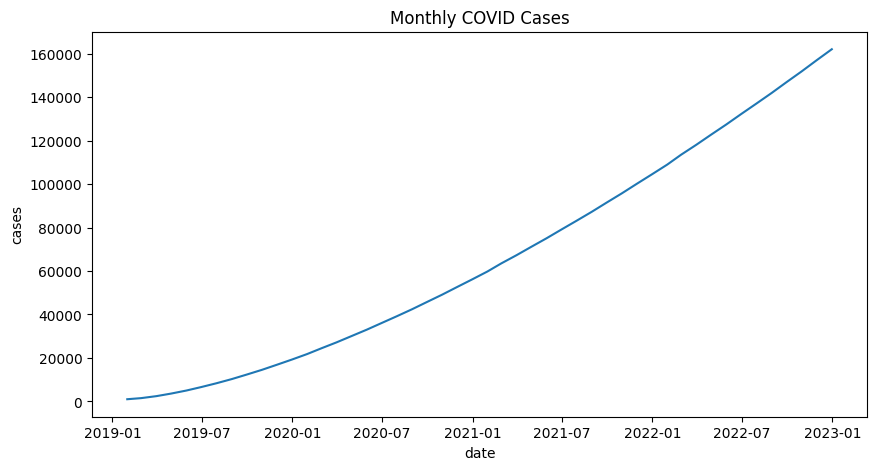

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(data=merged, x='date', y='cases')
plt.title('Monthly COVID Cases')
plt.show()

## Unemployment Rate Over Time
This plot shows how the unemployment rate changed during the same period.

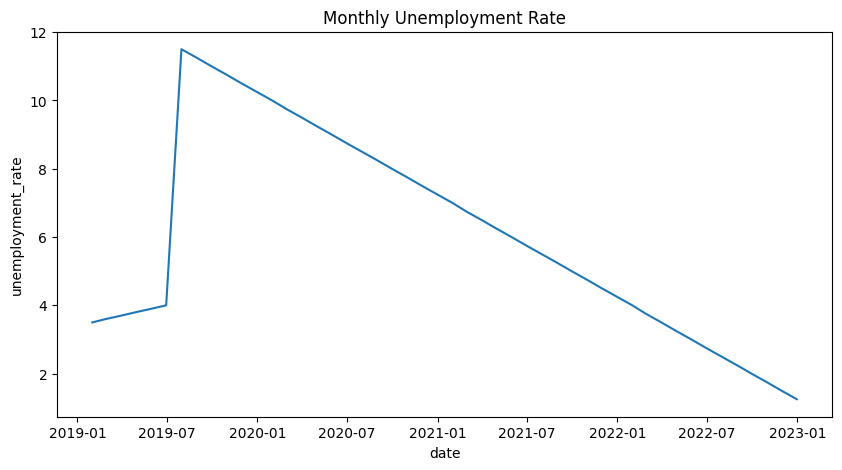

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(data=merged, x='date', y='unemployment_rate')
plt.title('Monthly Unemployment Rate')
plt.show()

## COVID Cases vs. Unemployment Rate (Combined)
This plot shows both trends on the same timeline for direct comparison.

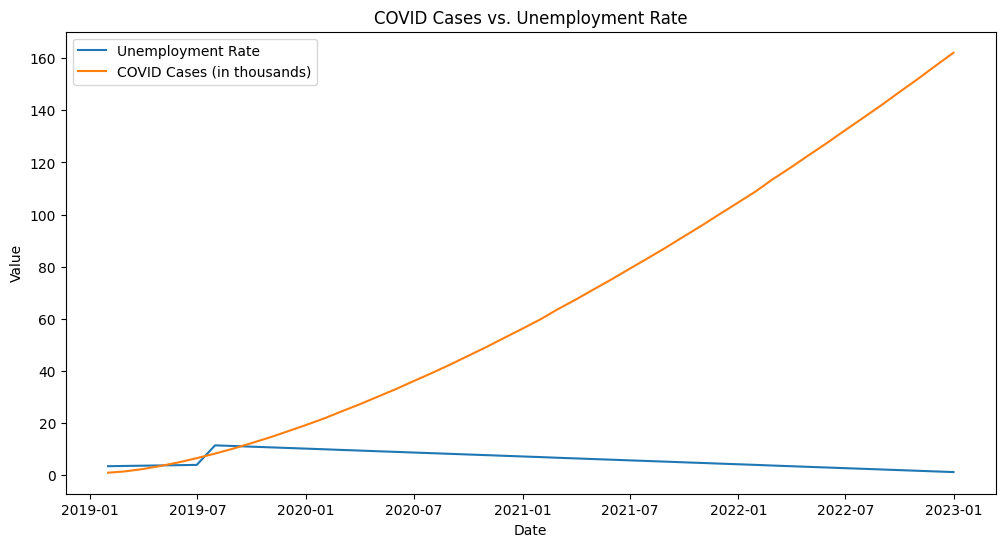

In [28]:
plt.figure(figsize=(12,6))
sns.lineplot(data=merged, x='date', y='unemployment_rate', label='Unemployment Rate')
sns.lineplot(data=merged, x='date', y=merged['cases']/1000, label='COVID Cases (in thousands)')
plt.title('COVID Cases vs. Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Month-over-Month Percent Change

To understand how rapidly COVID cases and unemployment rates shifted each month, we calculate the month-over-month percent change for both. This highlights sudden spikes, declines, and the relative volatility of each trend over time.

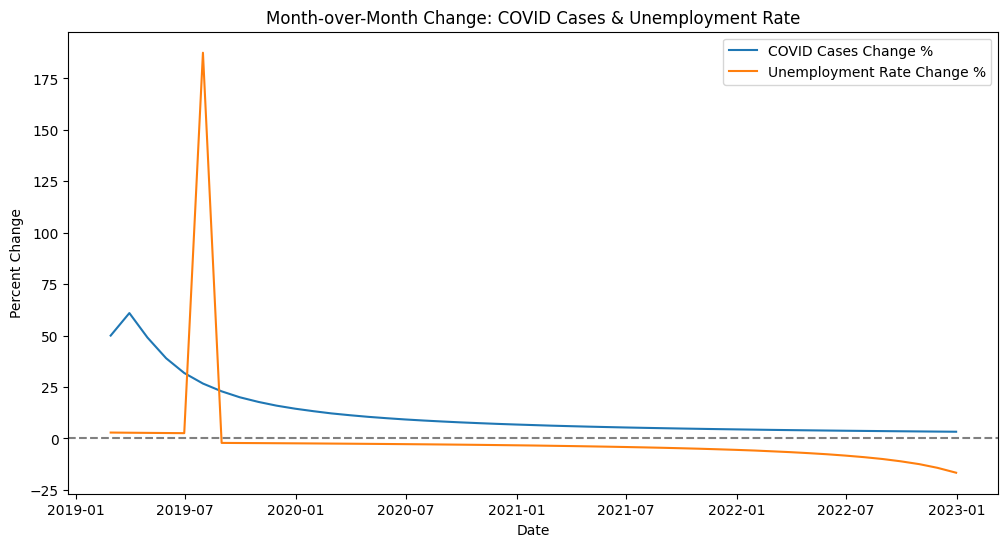

In [29]:
merged['cases_change_pct'] = merged['cases'].pct_change() * 100
merged['unemployment_change_pct'] = merged['unemployment_rate'].pct_change() * 100

plt.figure(figsize=(12,6))
sns.lineplot(data=merged, x='date', y='cases_change_pct', label='COVID Cases Change %')
sns.lineplot(data=merged, x='date', y='unemployment_change_pct', label='Unemployment Rate Change %')
plt.title('Month-over-Month Change: COVID Cases & Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.show()

## Correlation  
The correlation matrix shows the relationship between COVID cases and unemployment rate.

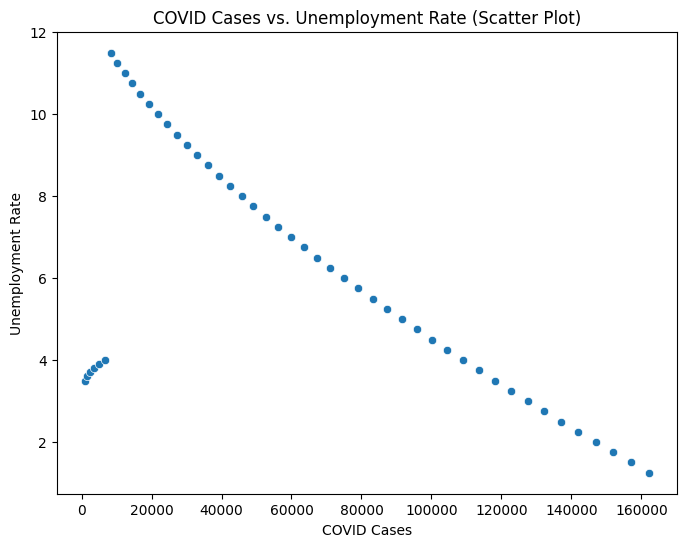

Correlation: -0.69


In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged, x='cases', y='unemployment_rate')
plt.title('COVID Cases vs. Unemployment Rate (Scatter Plot)')
plt.xlabel('COVID Cases')
plt.ylabel('Unemployment Rate')
plt.show()

corr = merged['cases'].corr(merged['unemployment_rate'])
print(f'Correlation: {corr:.2f}')

## Conclusion & Key Insights
- COVID cases surged in waves but unemployment spiked early and then recovered.
- The percent change highlights how sharp the early impacts were compared to later months.
- Correlation shows a moderate relationship; other economic factors played a role.
- This end-to-end story demonstrates clean BI analyst skills: sourcing, cleaning, visualizing, and communicating insights.